In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [22]:
df=pd.read_csv('M:\Time_series\EnergyDemand\TimeSeries_TotalSolarGen_and_Load_IT_2016.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\ACER\AppData\Local\Temp\ipykernel_27424\3323784500.py:1: SyntaxWarning: invalid escape sequence '\T'
  df=pd.read_csv('M:\Time_series\EnergyDemand\TimeSeries_TotalSolarGen_and_Load_IT_2016.csv')


,utc_timestamp,IT_load_new,IT_solar_generation
0,2016-01-01T00:00:00Z,21665.0,1
1,2016-01-01T01:00:00Z,20260.0,0
2,2016-01-01T02:00:00Z,19056.0,0
3,2016-01-01T03:00:00Z,18407.0,0
4,2016-01-01T04:00:00Z,18425.0,0


In [23]:
df['utc_timestamp']=pd.to_datetime(df['utc_timestamp'])



In [24]:
df.head()

,utc_timestamp,IT_load_new,IT_solar_generation
0,2016-01-01 00:00:00+00:00,21665.0,1
1,2016-01-01 01:00:00+00:00,20260.0,0
2,2016-01-01 02:00:00+00:00,19056.0,0
3,2016-01-01 03:00:00+00:00,18407.0,0
4,2016-01-01 04:00:00+00:00,18425.0,0


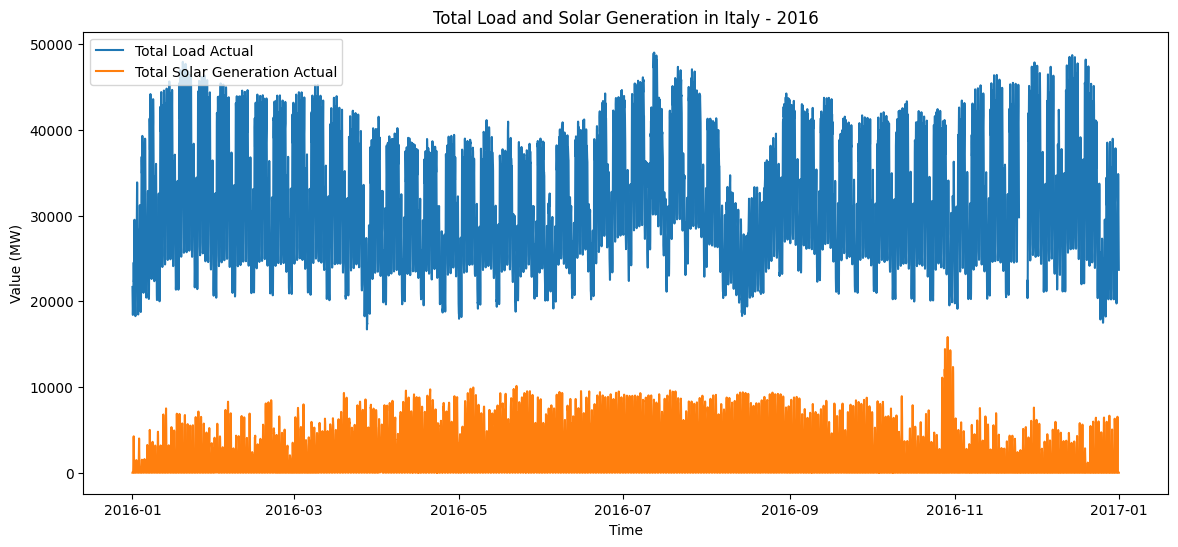

In [27]:
plt.figure(figsize=(14,6))

plt.plot(df["utc_timestamp"],df["IT_load_new"],label='Total Load Actual')
plt.plot(df["utc_timestamp"],df["IT_solar_generation"],label='Total Solar Generation Actual')
plt.xlabel('Time')
plt.ylabel('Value (MW)')
plt.title('Total Load and Solar Generation in Italy - 2016')
plt.legend()

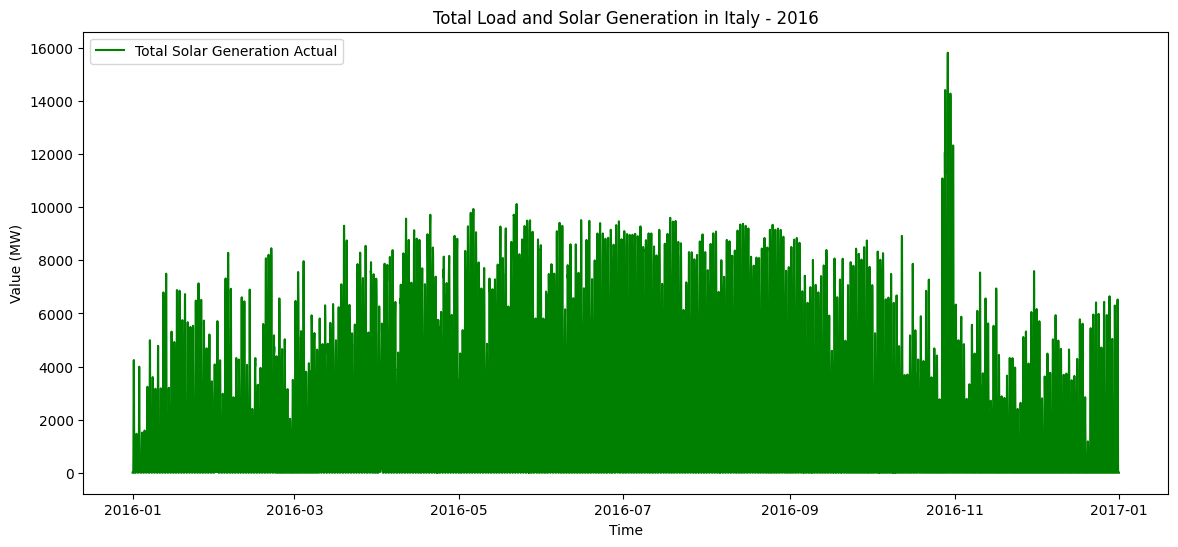

In [30]:
plt.figure(figsize=(14,6))


plt.plot(df["utc_timestamp"],df["IT_solar_generation"],label='Total Solar Generation Actual',color='green')
plt.xlabel('Time')
plt.ylabel('Value (MW)')
plt.title('Total Load and Solar Generation in Italy - 2016')
plt.legend()

The plot shows both the load and solar generation over time for the year 2016. The load appears to have a cyclical pattern with peaks and valleys, possibly corresponding to daily patterns of electricity use.
The solar generation also shows a clear pattern, with generation during the day and no generation at night (as expected). The amount of solar generation also appears to fluctuate throughout the year, likely due to seasonal changes in sunlight.
Before moving on to time series analysis and forecasting with ARIMA, it's important to check for stationarity in your time series data. Stationarity is a property of time series data that implies the mean, variance, and autocorrelation structure do not change over time. Many time series models, including ARIMA, require the data to be stationary.
Let's perform an Augmented Dickey-Fuller test to check the stationarity of the time series. The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

## Handle missing value 

In [31]:
df.isnull().sum()

utc_timestamp           0
IT_load_new            72
IT_solar_generation     0
dtype: int64

In [43]:
df.ffill(inplace=True)

print("Missing values handled.")
print("After filling missing values\n",df.isnull().sum())

Missing values handled.
After filling missing values
 utc_timestamp          0
IT_load_new            0
IT_solar_generation    0
dtype: int64


In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive=seasonal_decompose(df["IT_load_new"],model='additive',period=30)

In [45]:
trend_additive=decomposition_additive.trend
seasonal_additive=decomposition_additive.seasonal
residual_additive=decomposition_additive.resid

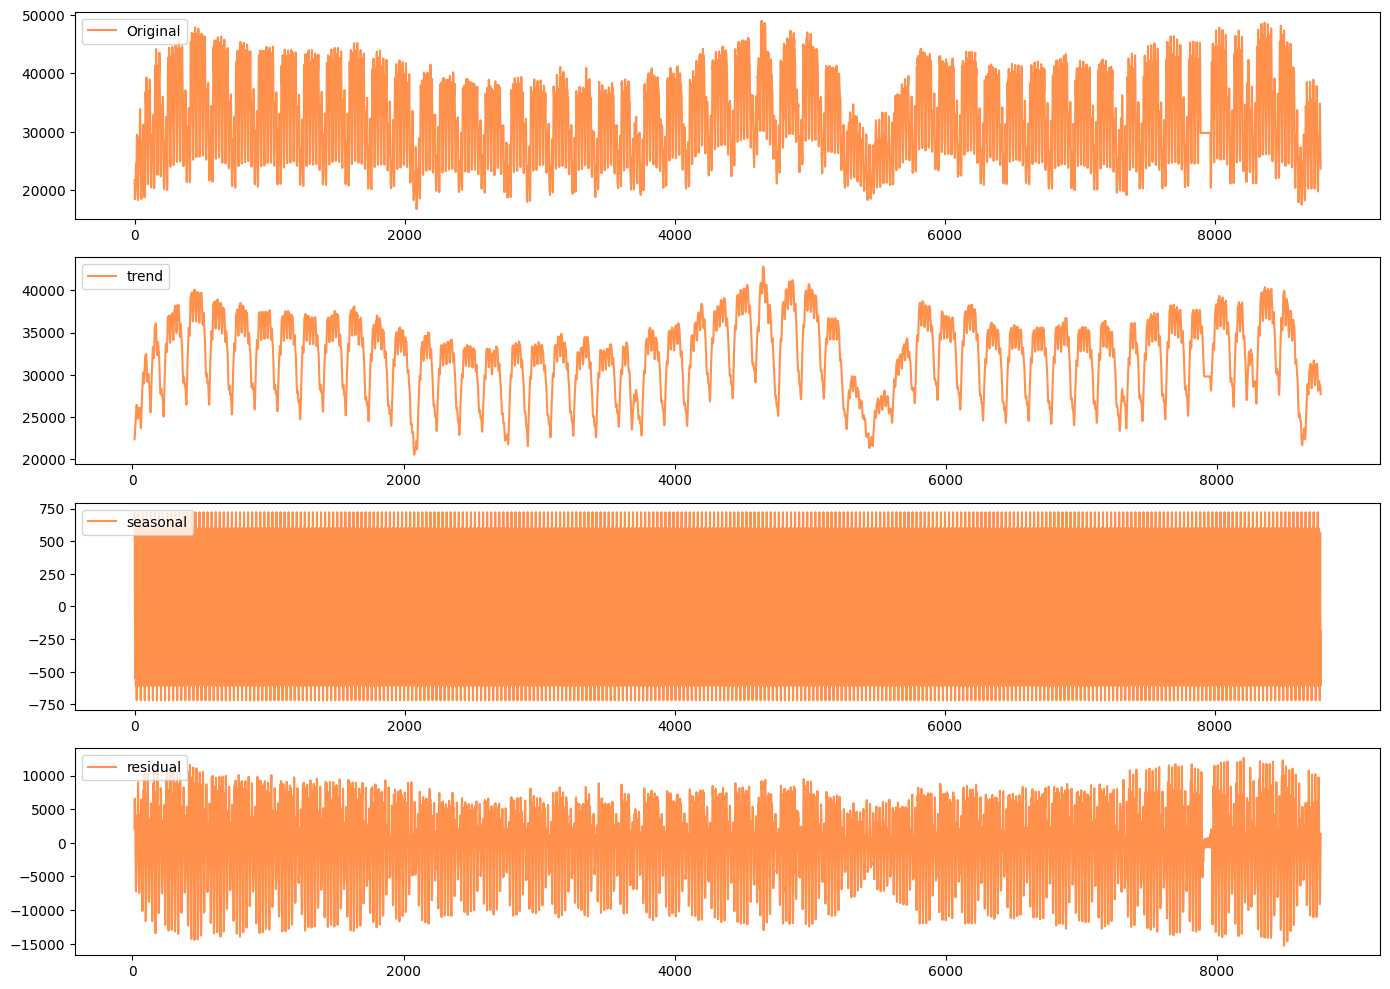

In [46]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(df["IT_load_new"],label="Original",color="#FF914D")
plt.legend(loc="upper left")
plt.subplot(412)
plt.plot(trend_additive,label="trend",color="#FF914D")
plt.legend(loc="upper left")
plt.subplot(413)
plt.plot(seasonal_additive,label="seasonal",color="#FF914D")
plt.legend(loc="upper left")
plt.subplot(414)
plt.plot(residual_additive,label="residual",color="#FF914D")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [48]:
from statsmodels.tsa.seasonal import STL

stl=STL(df["IT_load_new"],period=30)
result=stl.fit()

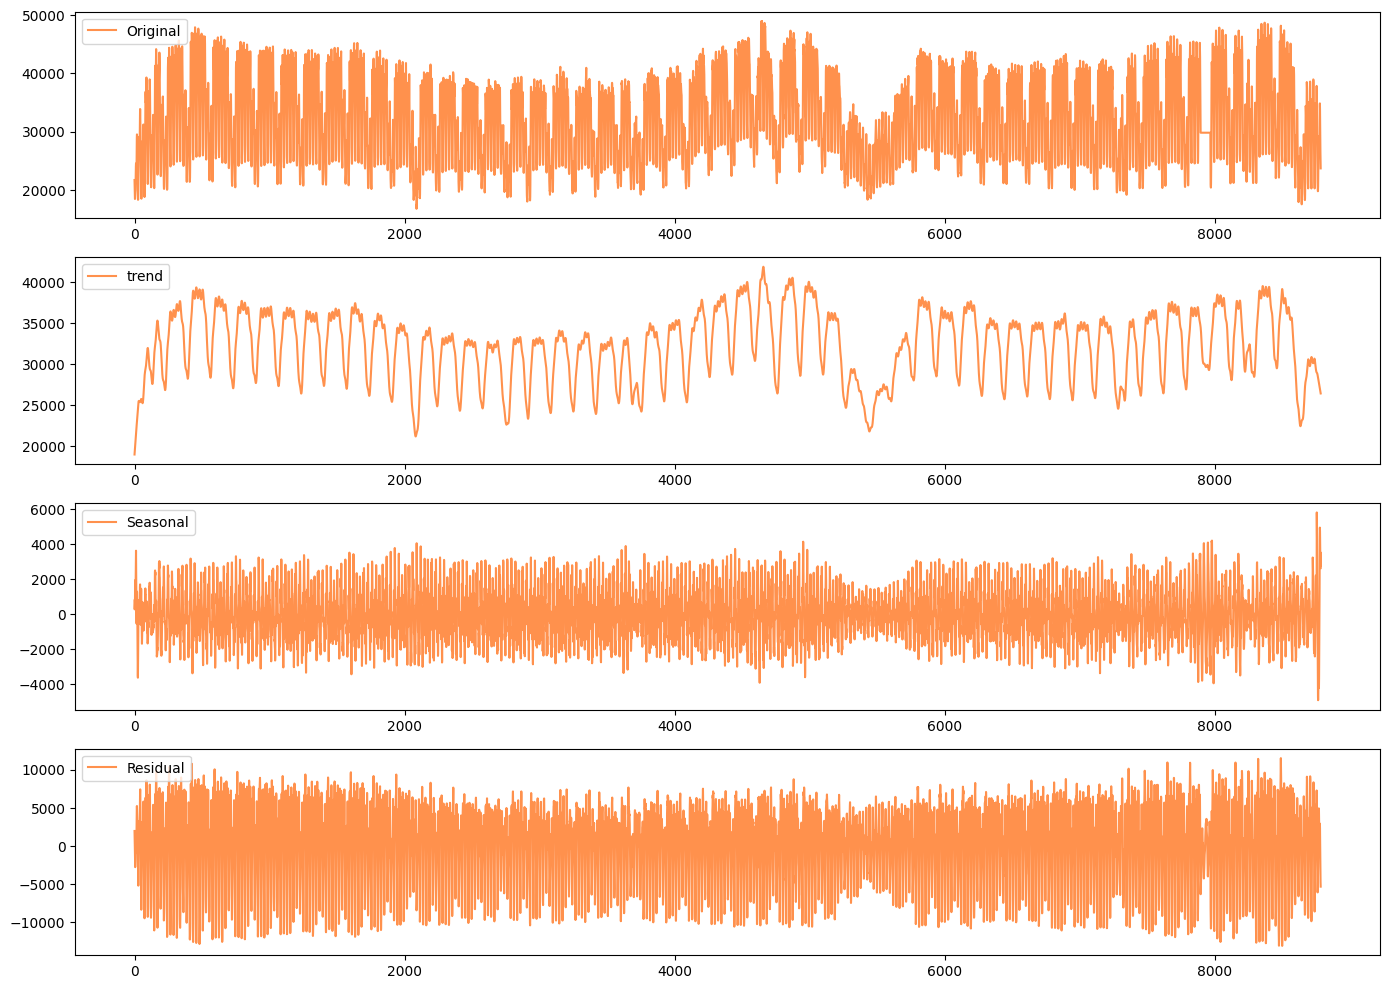

In [49]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(result.observed,label="Original",color="#FF914D")
plt.legend(loc="upper left")
plt.subplot(412)
plt.plot(result.trend,label="trend",color="#FF914D")
plt.legend(loc="upper left")
plt.subplot(413)
plt.plot(result.seasonal,label="Seasonal",color="#FF914D")
plt.legend(loc="upper left")
plt.subplot(414)
plt.plot(result.resid,label="Residual",color="#FF914D")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()
